# Cross Validation

In [1]:
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data')

In [2]:
from sklearn.preprocessing import LabelEncoder
X = df.iloc[:, 2:].values
y = df.iloc[:, 1].values

le = LabelEncoder()
y = le.fit_transform(y)
le.classes_

array(['B', 'M'], dtype=object)

In [3]:
le.transform(['M', 'B'])

array([1, 0])

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)

In [5]:
# pipeline을 이용하여 한번에 진행
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
pipe_lr = make_pipeline(StandardScaler(), PCA(n_components=2), LogisticRegression(random_state=1, solver='lbfgs'))

pipe_lr.fit(X_train, y_train)
y_pred = pipe_lr.predict(X_test)
print('Test Accuracy : %.3f' % pipe_lr.score(X_test, y_test))

Test Accuracy : 0.930


In [6]:
import numpy as np
from sklearn.model_selection import StratifiedKFold

kfold = StratifiedKFold(n_splits=10).split(X_train, y_train)
scores = []
for k, (train, test) in enumerate(kfold):
    pipe_lr.fit(X_train[train], y_train[train])
    score = pipe_lr.score(X_train[test], y_train[test])
    scores.append(score)
    print('Fold: %2d, CLass dist.: %s, Acc: %.3f' % (k+1, np.bincount(y_train[train]), score))

# 코드로 구현

Fold:  1, CLass dist.: [256 152], Acc: 0.913
Fold:  2, CLass dist.: [256 152], Acc: 0.935
Fold:  3, CLass dist.: [256 152], Acc: 0.957
Fold:  4, CLass dist.: [256 152], Acc: 0.891
Fold:  5, CLass dist.: [257 152], Acc: 0.978
Fold:  6, CLass dist.: [257 152], Acc: 0.978
Fold:  7, CLass dist.: [257 152], Acc: 0.978
Fold:  8, CLass dist.: [257 152], Acc: 0.911
Fold:  9, CLass dist.: [257 152], Acc: 0.933
Fold: 10, CLass dist.: [256 153], Acc: 0.978


In [7]:
print('\nCV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))


CV accuracy: 0.945 +/- 0.031


In [8]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(estimator=pipe_lr, X = X_train, y = y_train, cv = 10, n_jobs=-1)
print('CV accuracy scores: %s' % scores)

CV accuracy scores: [0.91304348 0.93478261 0.95652174 0.89130435 0.97777778 0.97777778
 0.97777778 0.91111111 0.93333333 0.97777778]


In [9]:
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

CV accuracy: 0.945 +/- 0.031


# Training, Validation accuracy plot으로 underfit/overfit 판별

In [10]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

pipe_lr = make_pipeline(StandardScaler(), LogisticRegression(penalty='l2', random_state=1, solver='lbfgs', max_iter=10000))
train_sizes, train_scores, test_scores = learning_curve(estimator=pipe_lr, X=X_train, y = y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv = 10, n_jobs = -1)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

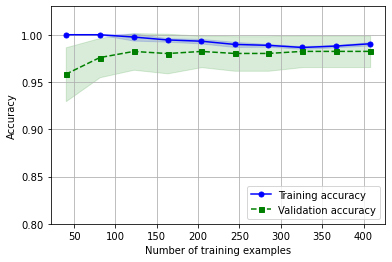

In [11]:
plt.plot(train_sizes, train_mean, color='blue', marker = 'o', markersize = 5, label = 'Training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha = 0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', marker = 's', markersize=5, linestyle = '--', label = 'Validation accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color = 'green')
plt.grid()
plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.legend(loc = 'lower right')
plt.ylim([0.8, 1.03])
plt.show()

# Validation curves 로 overfit/underfit 판별

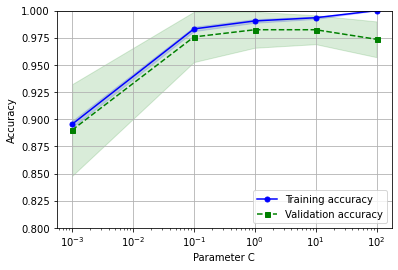

In [13]:
from sklearn.model_selection import validation_curve
param_range = [0.001, 0.1, 1.0, 10.0, 100.0]
train_scores, test_scores = validation_curve(estimator=pipe_lr, X=X_train, y=y_train, param_name='logisticregression__C', param_range=param_range, cv = 10)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
plt.plot(param_range, train_mean, color = 'blue', marker = 'o', markersize = 5, label = 'Training accuracy')
plt.fill_between(param_range, train_mean + train_std, train_mean - train_std, alpha = 0.15, color = 'blue')
plt.plot(param_range, test_mean, color = 'green', linestyle = '--', marker = 's', markersize = 5, label = 'Validation accuracy')
plt.fill_between(param_range, test_mean + test_std, test_mean - test_std, alpha = 0.15, color = 'green')
plt.grid()
plt.xscale('log')
plt.legend(loc = 'lower right')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1.0])
plt.show()

# Tunning hyperparameters via grid search

In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

pipe_svc = make_pipeline(StandardScaler(), SVC(random_state=1))


# 리스트 형태로 넣을 값들 지정
param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]

# 딕셔너리 형태로 하이퍼 파라미터에 모델__파리미터 : 값 형태로 지정
param_grid = [{'svc__C' : param_range,
               'svc__kernel' : ['linear']},
              {'svc__C' : param_range,
               'svc__gamma' : param_range,
               'svc__kernel' : ['rbf']}]

gs = GridSearchCV(estimator=pipe_svc, param_grid = param_grid, scoring='accuracy', cv = 10, refit=True, n_jobs=-1)
gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

0.9779710144927536
{'svc__C': 10.0, 'svc__gamma': 0.01, 'svc__kernel': 'rbf'}


In [16]:
clf = gs.best_estimator_ # 제일 성능 좋은 모델을 객체로 저장
clf.fit(X_train, y_train)
print('Test Accuracy: %.3f' % clf.score(X_test, y_test))

Test Accuracy: 0.965


# Nested cross-validation in Algorithm selection

In [17]:
gs = GridSearchCV(estimator=pipe_svc, param_grid=param_grid, scoring='accuracy', cv=2)
# GridSearchCV를 통해 parameter tunning
scores = cross_val_score(gs, X_train, y_train, scoring='accuracy', cv=5)
# k-fold CV를 통해 gridsearch cv를 통해 찾은 파라미터를 이용하여 학습
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

CV accuracy: 0.978 +/- 0.012


In [18]:
from sklearn.tree import DecisionTreeClassifier

gs = GridSearchCV(estimator=DecisionTreeClassifier(random_state=0),
                  param_grid=[{'max_depth' : [1, 2, 3, 4, 5, 6, 7, None]}],
                  scoring='accuracy', cv=2)

scores = cross_val_score(gs, X_train, y_train, scoring='accuracy', cv = 5)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

# 즉 CV의 결과 SVM이 DecisionTreeClassifier보다 더 데이터에 맞다는 결론을 내리기 가능

CV accuracy: 0.932 +/- 0.017


# 분류 모델에서의 다른 평가지표들

In [19]:
from sklearn.metrics import confusion_matrix

pipe_svc.fit(X_train, y_train)
y_pred = pipe_svc.predict(X_test)
confmat = confusion_matrix(y_true = y_test, y_pred=y_pred)
print(confmat)

[[72  0]
 [ 5 37]]


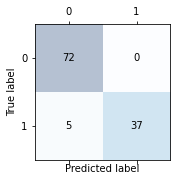

In [21]:
fig, ax = plt.subplots(figsize = (2.5, 2.5))
ax.matshow(confmat, cmap = plt.cm.Blues, alpha = 0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y = i, s = confmat[i, j], va = 'center', ha = 'center')

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

# 72 : 0인 class를 참으로 분류
# 37 : 1인 class가  test-set에서 37
# 5 : 1인 class를 0으로 분류
# 0 : 0인 class를 1로 분류

In [22]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score, f1_score

print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=y_pred))

Precision: 1.000


In [23]:
print('Recall: %.3f' % recall_score(y_true=y_test, y_pred=y_pred))

Recall: 0.881


In [24]:
print('F1 score: %.3f' % f1_score(y_true=y_test, y_pred=y_pred))

# 즉 모델에 대해 정확도 말고도 다른 지표들을 이용하여 복합적으로 평가를 하여야함

F1 score: 0.937


In [25]:
from sklearn.metrics import make_scorer, f1_score

c_gamma_range = [0.01, 0.1, 1.0, 10.0]
param_grid = [{'svc__C' : c_gamma_range,
               'svc__kernel' : ['linear']},
              {'svc__C' : c_gamma_range,
               'svc__gamma' : c_gamma_range,
               'svc__kernel' : ['rbf']}]
scorer = make_scorer(f1_score, pos_label = 0)

gs = GridSearchCV(estimator=pipe_svc,
                  param_grid=param_grid,
                  scoring=scorer, # gridsearchCV에서 accuracy 말고 make_scorer 메서드를 이용하면 다른 점수 지표를 도입가능
                  cv = 10)

gs = gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

0.9828077166509601
{'svc__C': 10.0, 'svc__gamma': 0.01, 'svc__kernel': 'rbf'}


# ROC Curve를 이용하여 특성 표현

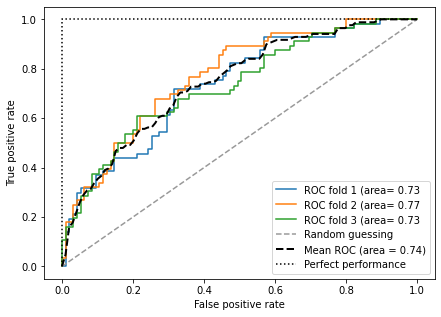

In [34]:
from sklearn.metrics import roc_curve, auc
from numpy import interp

pipe_lr = make_pipeline(StandardScaler(), PCA(n_components=2), LogisticRegression(penalty='l2', random_state=1, solver='lbfgs', C=100.0))
X_train2 = X_train[:, [4, 14]]

cv = list(StratifiedKFold(n_splits=3, shuffle=True, random_state=1).split(X_train, y_train))

fig = plt.figure(figsize=(7, 5))

mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []

for i, (train, test) in enumerate(cv):
    probas = pipe_lr.fit(X_train2[train], y_train[train]).predict_proba(X_train2[test])
    fpr, tpr, thresholds = roc_curve(y_train[test], probas[:, 1], pos_label=1)
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label = 'ROC fold %d (area= %0.2f' % (i+1, roc_auc))

plt.plot([0, 1], [0, 1], linestyle = '--', color = (0.6, 0.6, 0.6), label = 'Random guessing')

mean_tpr /= len(cv)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, 'k--', label = 'Mean ROC (area = %0.2f)' % mean_auc, lw = 2)
plt.plot([0, 0, 1], [0, 1, 1], linestyle = ':', color = 'black', label = 'Perfect performance')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc='lower right')
plt.show()

# Multiclass classification에서의 score metrics

In [35]:
pre_scorer = make_scorer(score_func=precision_score, pos_label = 1, greater_is_better=True, average = 'micro')

# Dealing imbalance class data

In [37]:
X_imb = np.vstack((X[y==0], X[y==1][:40]))
y_imb = np.hstack((y[y==0], y[y==1][:40]))

y_pred = np.zeros(y_imb.shape[0])
np.mean(y_pred == y_imb)*100

# 불균형 데이터 만들기

89.92443324937027

In [38]:
from sklearn.utils import resample # upsample
print('Number of class 1 examples before:', X_imb[y_imb == 1].shape[0])

Number of class 1 examples before: 40


In [39]:
X_upsampled, y_upsampled = resample(X_imb[y_imb == 1], y_imb[y_imb == 1], replace=True, n_samples=X_imb[y_imb == 0].shape[0], random_state=123)
print('Number of class 1 examples after:', X_upsampled.shape[0])

Number of class 1 examples after: 357


In [40]:
X_bal = np.vstack((X[y==0], X_upsampled))
y_bal = np.hstack((y[y==0], y_upsampled))

y_pred = np.zeros(y_bal.shape[0])
np.mean(y_pred == y_bal)*100

50.0